In [1]:
from labjack import ljm
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Open first found LabJack
#handle = ljm.openS("ANY", "ANY", "ANY")  # Any device, Any connection, Any identifier
handle = ljm.openS("T7", "LJM_ctETHERNET", "LJM_idANY")  # T7 device, Any connection, Any identifier
#handle = ljm.openS("T7", "ANY", "ANY")  # T4 device, Any connection, Any identifier
#handle = ljm.open(ljm.constants.dtANY, ljm.constants.ctANY, "ANY")  # Any device, Any connection, Any identifier
#handle = ljm_open(LJM_dtT7, LJM_ctETHERNET, "470010729", ...)

info = ljm.getHandleInfo(handle)
print("Opened a LabJack with Device type: %i, Connection type: %i,\n"
      "Serial number: %i, IP address: %s, Port: %i,\nMax bytes per MB: %i" %
      (info[0], info[1], info[2], ljm.numberToIP(info[3]), info[4], info[5]))

def write_to(name, state):
    deviceType = info[0]
    # Output state = low (0 = low, 1 = high)
    ljm.eWriteName(handle, name, state)
    print("\nSet %s state : %f" % (name, state))



Opened a LabJack with Device type: 7, Connection type: 3,
Serial number: 470028060, IP address: 192.168.1.110, Port: 502,
Max bytes per MB: 1040


In [3]:
def switch_on(num):
    write_to("DIO"+str(2*num-1), 0)
    write_to("DIO"+str(2*num), 1)

def switch_off(num):
    write_to("DIO"+str(2*num-1), 1)
    write_to("DIO"+str(2*num), 0)

In [4]:
def switch_all_off(delay=0.1):
    for i in range(1, 11):
        time.sleep(delay)
        switch_off(i)

def switch_all_on(delay=0.1):
    for i in range(1, 11):
        time.sleep(delay)
        switch_on(i)

def set_all_dio_to_zero(delay=0.1):
    for i in range(1, 11):
        time.sleep(delay)
        write_to("DIO"+str(2*i-1), 0)
        write_to("DIO"+str(2*i), 0)

def set_all_dio_to_one(delay=0.1):
    for i in range(1, 11):
        time.sleep(delay)
        write_to("DIO"+str(2*i), 1)
        write_to("DIO"+str(2*i-1), 1)

def set_even_dio(state, delay=0.1):
    for i in range(1, 11):
        time.sleep(delay)
        write_to("DIO"+str(2*i), state)

def set_odd_dio(state, delay=0.1):
    for i in range(1, 11):
        time.sleep(delay)
        write_to("DIO"+str(2*i-1), state)

In [ ]:
192.168.1.110

In [20]:
switch_on(1)


Set DIO1 state : 0.000000

Set DIO2 state : 1.000000


In [ ]:
set_all_dio_to_zero()

In [7]:
switch_all_off()


Set DIO1 state : 1.000000

Set DIO2 state : 0.000000

Set DIO3 state : 1.000000

Set DIO4 state : 0.000000

Set DIO5 state : 1.000000

Set DIO6 state : 0.000000

Set DIO7 state : 1.000000

Set DIO8 state : 0.000000

Set DIO9 state : 1.000000

Set DIO10 state : 0.000000

Set DIO11 state : 1.000000

Set DIO12 state : 0.000000

Set DIO13 state : 1.000000

Set DIO14 state : 0.000000

Set DIO15 state : 1.000000

Set DIO16 state : 0.000000

Set DIO17 state : 1.000000

Set DIO18 state : 0.000000

Set DIO19 state : 1.000000

Set DIO20 state : 0.000000


In [6]:
switch_all_on()


Set DIO1 state : 0.000000

Set DIO2 state : 1.000000

Set DIO3 state : 0.000000

Set DIO4 state : 1.000000

Set DIO5 state : 0.000000

Set DIO6 state : 1.000000

Set DIO7 state : 0.000000

Set DIO8 state : 1.000000

Set DIO9 state : 0.000000

Set DIO10 state : 1.000000

Set DIO11 state : 0.000000

Set DIO12 state : 1.000000

Set DIO13 state : 0.000000

Set DIO14 state : 1.000000

Set DIO15 state : 0.000000

Set DIO16 state : 1.000000

Set DIO17 state : 0.000000

Set DIO18 state : 1.000000

Set DIO19 state : 0.000000

Set DIO20 state : 1.000000


In [ ]:
set_all_dio_to_one()

In [ ]:
# Close handle
ljm.close(handle)

# Read AIN

In [32]:
def read(name):
    result = ljm.eReadName(handle, name)
    # print("\n%s state : %f" % (name, result))
    return result

In [7]:
data_off = {}
for i in range(1, 15):
    data_off["AIN"+str(i)] = np.array([])
for ind in range(10):
    print(ind)
    time.sleep(0.5)
    for i in range(1, 15):
        data_off["AIN"+str(i)] = np.append(data_off["AIN"+str(i)], read("AIN"+str(i)))

0
1
2
3
4
5
6
7
8
9


In [42]:
switch_all_on()


Set DIO1 state : 0.000000

Set DIO2 state : 1.000000

Set DIO3 state : 0.000000

Set DIO4 state : 1.000000

Set DIO5 state : 0.000000

Set DIO6 state : 1.000000

Set DIO7 state : 0.000000

Set DIO8 state : 1.000000

Set DIO9 state : 0.000000

Set DIO10 state : 1.000000

Set DIO11 state : 0.000000

Set DIO12 state : 1.000000

Set DIO13 state : 0.000000

Set DIO14 state : 1.000000

Set DIO15 state : 0.000000

Set DIO16 state : 1.000000

Set DIO17 state : 0.000000

Set DIO18 state : 1.000000

Set DIO19 state : 0.000000

Set DIO20 state : 1.000000


In [ ]:
data = {}
for i in range(1, 15):
    data["AIN"+str(i)] = np.array([])
for ind in range(10):
    print(ind)
    time.sleep(0.5)
    for i in range(1, 15):
        data["AIN"+str(i)] = np.append(data["AIN"+str(i)], read("AIN"+str(i)))

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(10, 10))
for i, ax in enumerate(axes.ravel()):
    ax.plot(data_off["AIN"+str(i)])
    ax.set_title("AIN"+str(i))
    ax.set_ylim(np.floor(np.nanmin(data_off["AIN"+str(i+1)])), np.ceil(np.nanmax(data_off["AIN"+str(i+1)])))
    ax.axhline(0.5, color="red")

plt.show()

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(10, 10))
for i, ax in enumerate(axes.ravel()):
    ax.plot(data["AIN"+str(i+1)])
    ax.set_title("AIN"+str(i+1))
    ax.set_ylim(np.floor(np.nanmin(data["AIN"+str(i+1)])), np.ceil(np.nanmax(data["AIN"+str(i+1)])))
    ax.axhline(0.5, color="red")

plt.show()

In [ ]:
data["AIN11"] - data_off["AIN11"]

In [ ]:
for i in range(1, 15):
    print(i)
    print(np.nanmedian(data_off["AIN"+str(i)], axis=0))
    print(np.nanmedian(data["AIN"+str(i)], axis=0))
    print(np.nanmedian(data["AIN"+str(i)] - data_off["AIN"+str(i)], axis=0))

In [ ]:
(12/5.2)/2.22

# Stress Tests

In [51]:
switch_all_off(0)


Set DIO1 state : 1.000000

Set DIO2 state : 0.000000

Set DIO3 state : 1.000000

Set DIO4 state : 0.000000

Set DIO5 state : 1.000000

Set DIO6 state : 0.000000

Set DIO7 state : 1.000000

Set DIO8 state : 0.000000

Set DIO9 state : 1.000000

Set DIO10 state : 0.000000

Set DIO11 state : 1.000000

Set DIO12 state : 0.000000

Set DIO13 state : 1.000000

Set DIO14 state : 0.000000

Set DIO15 state : 1.000000

Set DIO16 state : 0.000000

Set DIO17 state : 1.000000

Set DIO18 state : 0.000000

Set DIO19 state : 1.000000

Set DIO20 state : 0.000000


In [ ]:
switch_off(2)

In [ ]:
for i in range(10000):
    time.sleep(0.05)
    switch_all_on(0.01)
    time.sleep(0.05)
    switch_all_off(0.01)

In [10]:
read("AIN13")

0.4972923994064331

# Juzz Tests

In [29]:
I1 = {"LJKey": "AIN13" , "Data": []}
I2 = {"LJKey": "AIN11" , "Data": []}
I3 = {"LJKey": "AIN9" , "Data": []}
I4 = {"LJKey": "AIN7" , "Data": []}
I5 = {"LJKey": "AIN5" , "Data": []}
I6 = {"LJKey": "AIN3" , "Data": []}
I7 = {"LJKey": "AIN1" , "Data": []}
I8 = {"LJKey": "AIN10" , "Data": []}
I9 = {"LJKey": "AIN8" , "Data":[]}
I10 ={"LJKey": "AIN6" , "Data": []}
V1 = {"LJKey": "AIN4" , "Data": []}
V2 = {"LJKey": "AIN2" , "Data": []}
V3 = {"LJKey": "AIN0" , "Data": []}

RelayCurrentList = [I1,I2,I3,I4,I5,I6,I7,I8,I9,I10]

In [42]:
switch_all_on(0.1)


Set DIO1 state : 0.000000

Set DIO2 state : 1.000000

Set DIO3 state : 0.000000

Set DIO4 state : 1.000000

Set DIO5 state : 0.000000

Set DIO6 state : 1.000000

Set DIO7 state : 0.000000

Set DIO8 state : 1.000000

Set DIO9 state : 0.000000

Set DIO10 state : 1.000000

Set DIO11 state : 0.000000

Set DIO12 state : 1.000000

Set DIO13 state : 0.000000

Set DIO14 state : 1.000000

Set DIO15 state : 0.000000

Set DIO16 state : 1.000000

Set DIO17 state : 0.000000

Set DIO18 state : 1.000000

Set DIO19 state : 0.000000

Set DIO20 state : 1.000000


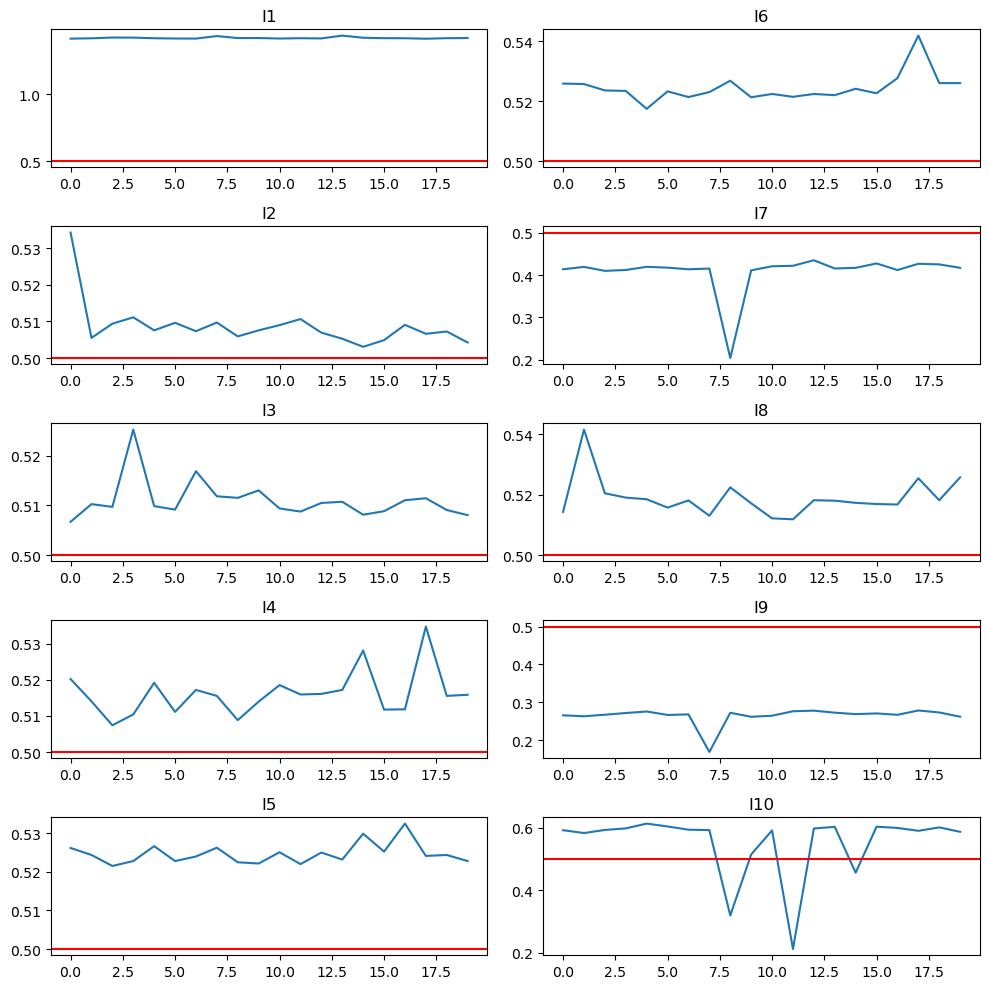

In [43]:
I1 = {"LJKey": "AIN13" , "Data": []}
I2 = {"LJKey": "AIN11" , "Data": []}
I3 = {"LJKey": "AIN9" , "Data": []}
I4 = {"LJKey": "AIN7" , "Data": []}
I5 = {"LJKey": "AIN5" , "Data": []}
I6 = {"LJKey": "AIN3" , "Data": []}
I7 = {"LJKey": "AIN1" , "Data": []}
I8 = {"LJKey": "AIN10" , "Data": []}
I9 = {"LJKey": "AIN8" , "Data":[]}
I10 ={"LJKey": "AIN6" , "Data": []}
V1 = {"LJKey": "AIN4" , "Data": []}
V2 = {"LJKey": "AIN2" , "Data": []}
V3 = {"LJKey": "AIN0" , "Data": []}

RelayCurrentList = [I1,I2,I3,I4,I5,I6,I7,I8,I9,I10]

for i in range(20):
    for index, current in enumerate(RelayCurrentList):
        current["Data"].append(read(current["LJKey"]))
        time.sleep(0.06)
        

fig, axes = plt.subplots(5, 2, figsize=(10, 10))
for index, current in enumerate(RelayCurrentList):
    if index <5:
        axes[index][0].plot(current["Data"])
        axes[index][0].set_title("I"+ str(index+1))
        axes[index][0].axhline(0.5, color="red")
    if index >=5:
        axes[index-5][1].plot(current["Data"])
        axes[index-5][1].set_title("I"+ str(index+1))
        axes[index-5][1].axhline(0.5, color="red")
    #ax.set_ylim(np.floor(np.nanmin(data_off["AIN"+str(i+1)])), np.ceil(np.nanmax(data_off["AIN"+str(i+1)])))
fig.tight_layout()
plt.show()

In [40]:
switch_all_off(0.1)


Set DIO1 state : 1.000000

Set DIO2 state : 0.000000

Set DIO3 state : 1.000000

Set DIO4 state : 0.000000

Set DIO5 state : 1.000000

Set DIO6 state : 0.000000

Set DIO7 state : 1.000000

Set DIO8 state : 0.000000

Set DIO9 state : 1.000000

Set DIO10 state : 0.000000

Set DIO11 state : 1.000000

Set DIO12 state : 0.000000

Set DIO13 state : 1.000000

Set DIO14 state : 0.000000

Set DIO15 state : 1.000000

Set DIO16 state : 0.000000

Set DIO17 state : 1.000000

Set DIO18 state : 0.000000

Set DIO19 state : 1.000000

Set DIO20 state : 0.000000


In [38]:
I1["Data"]

[1.428470492362976,
 1.4258652925491333,
 1.4238916635513306,
 1.4161548614501953,
 1.434470534324646,
 1.4218389987945557,
 1.4160759449005127,
 1.4219969511032104,
 1.4230232238769531,
 1.4216021299362183,
 1.4205758571624756,
 1.4238126277923584,
 1.4241284132003784,
 1.4218389987945557,
 1.422707438468933,
 1.4216811656951904,
 1.433523178100586,
 1.4191547632217407,
 1.420181155204773,
 1.4234968423843384]